In [9]:
# from pcntoolkit.util.hbr_utils import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as spt

In [10]:
x = np.linspace(-11,11,200)
confs = [(0,1)
        ,(-1,1)
        ,(3,1)
        ,(0,3)
        ,(2,0.5)]

def sas(x, e, d):
    return np.sinh(d*np.arcsinh(x) - e)

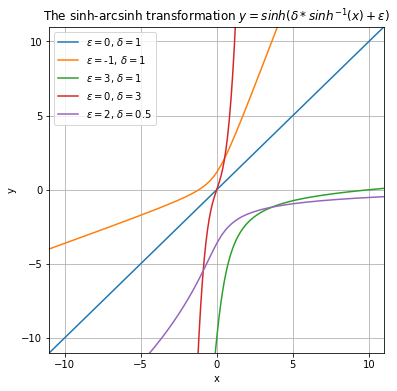

In [11]:
fig=plt.figure(figsize=(6,6))
for e, d in confs:
    plt.plot(x, sas(x, e, d), label=f'$\epsilon=${e}, $\delta=${d}')
plt.ylim(-11,11)
plt.xlim(-11,11)
plt.xticks(np.linspace(-10,10,5))
plt.yticks(np.linspace(-10,10,5))

plt.grid(True)
plt.legend()
plt.title("The sinh-arcsinh transformation $y = sinh(\\delta*sinh^{-1}(x) + \\epsilon)$")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/sinharcsinh.pdf")

plt.show()

In [12]:
mu,sigma, epsilon, delta = 1,1,0,0.5


x = np.random.randn(100000)
x11 = sas(mu + sigma*x, epsilon, delta)
x21 = mu + sigma*sas(x, epsilon, delta)

x12 = sas(mu+0.5 + sigma*x, epsilon, delta)
x22 = mu+0.5 + sigma*sas(x, epsilon, delta)

dens11 = spt.gaussian_kde(x11)
dens21 = spt.gaussian_kde(x21)
dens12 = spt.gaussian_kde(x12)
dens22 = spt.gaussian_kde(x22)
ran = np.linspace(-3,3,200)

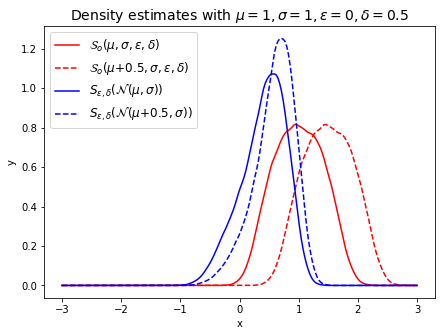

In [13]:
fig=plt.figure(figsize=(7,5))

plt.plot(ran, dens21(ran), label='$\mathcal{S}_o(\mu,\sigma,\epsilon,\delta)$', color='red', linestyle= '-')
plt.plot(ran, dens22(ran), label='$\mathcal{S}_o(\mu\plus0.5,\sigma,\epsilon,\delta)$', color='red', linestyle= '--')

plt.plot(ran, dens11(ran), label='$S_{\epsilon,\delta}(\mathcal{N}(\mu, \sigma))$', color='blue', linestyle= '-')
plt.plot(ran, dens12(ran), label='$S_{\epsilon,\delta}(\mathcal{N}(\mu\plus0.5, \sigma))$',color='blue', linestyle= '--')


plt.legend(fontsize=12)
plt.title(f"Density estimates with $\mu={mu}, \sigma = {sigma}, \epsilon={epsilon}, \delta={delta}$",fontsize=14)

plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/density_compare{mu}{sigma}{epsilon}{delta}.png",dpi=300)

plt.show()

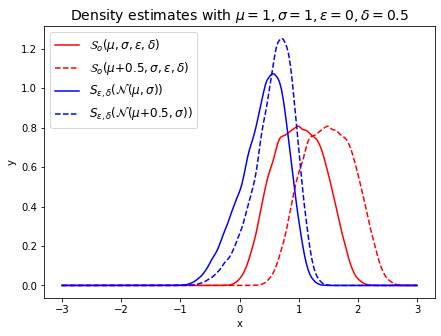

In [8]:
fig=plt.figure(figsize=(7,5))

plt.plot(ran, dens21(ran), label='$\mathcal{S}_o(\mu,\sigma,\epsilon,\delta)$', color='red', linestyle= '-')
plt.plot(ran, dens22(ran), label='$\mathcal{S}_o(\mu\plus0.5,\sigma,\epsilon,\delta)$', color='red', linestyle= '--')

plt.plot(ran, dens11(ran), label='$S_{\epsilon,\delta}(\mathcal{N}(\mu, \sigma))$', color='blue', linestyle= '-')
plt.plot(ran, dens12(ran), label='$S_{\epsilon,\delta}(\mathcal{N}(\mu\plus0.5, \sigma))$',color='blue', linestyle= '--')


plt.legend(fontsize=12)
plt.title(f"Density estimates with $\mu={mu}, \sigma = {sigma}, \epsilon={epsilon}, \delta={delta}$",fontsize=14)

plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/density_compare{mu}{sigma}{epsilon}{delta}.png",dpi=300)

plt.show()

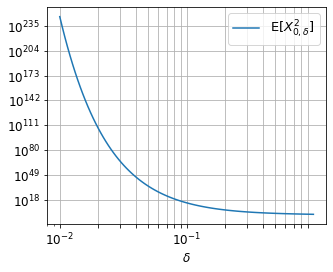

In [52]:
fig= plt.figure(figsize=(5,4))
deltas = np.exp(np.linspace(np.log(0.01), np.log(1), 100))
# plt.plot(deltas, m(0, deltas, 1), label = "E[$Z^2_{0, \delta}$]")
plt.plot(deltas, m(0, deltas, 2), label = "E[$X^2_{0, \delta}$]")
# plt.plot(deltas, K(1/deltas, 0.25), label = '$K_{1/\delta}(1/4)$')

ticks = np.linspace(0.1, 1, 9, endpoint=False)
ticks2 = np.concatenate((ticks/10, ticks), axis = 0)
ticks3 = np.concatenate((ticks*1e20,ticks*1e100), axis=0)
plt.yscale('log')
plt.xscale('log')
plt.xticks(ticks2, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("$\delta$", fontsize=12)
plt.legend(fontsize=13)
plt.grid()
plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/variance_as_function_of_delta.png", dpi=300, bbox_inches='tight')